# Análisis exploratorio de datos.

> Análisis para el dataframe de los datos climaticos.

Este análisis esta orientado de manera singular para cada estación. De este manera, nos evitamos incluir información erronea de otras estaciones cuando querramos imputar datos nuevos para reemplazar valores nulos. 

In [1]:
# Módulos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# opciones
pd.set_option("display.max_columns", 100)
sns.set()

In [93]:
df, df_estaciones = pd.read_parquet('../data/datos-todas-estaciones.parquet'), pd.read_csv('../data/estaciones-meteorologicas-inta.csv')
df.shape, df_estaciones.shape

((923867, 38), (169, 12))

Para hacer más facil el tratamiento de las columnas, voy a normalizar los nombres a minusculas.

In [94]:
df.columns = [col.lower().strip() for col in df.columns]
df.columns

Index(['fecha', 'temperatura_abrigo_150cm', 'temperatura_abrigo_150cm_maxima',
       'temperatura_abrigo_150cm_minima', 'temperatura_intemperie_5cm_minima',
       'temperatura_intemperie_50cm_minima', 'temperatura_suelo_5cm_media',
       'temperatura_suelo_10cm_media', 'temperatura_inte_5cm',
       'temperatura_intemperie_150cm_minima', 'humedad_suelo',
       'precipitacion_pluviometrica', 'precipitacion_cronologica',
       'precipitacion_maxima_30minutos', 'heliofania_efectiva',
       'heliofania_relativa', 'tesion_vapor_media', 'humedad_media',
       'humedad_media_8_14_20', 'rocio_medio', 'duracion_follaje_mojado',
       'velocidad_viento_200cm_media', 'direccion_viento_200cm',
       'velocidad_viento_1000cm_media', 'direccion_viento_1000cm',
       'velocidad_viento_maxima', 'presion_media', 'radiacion_global',
       'horas_frio', 'unidades_frio', 'id_estacion', 'granizo', 'nieve',
       'radiacion_neta', 'evaporacion_tanque', 'evapotranspiracion_potencial',
       'pro

### 1. Entender la estructura del dataset
- Revisar dimensiones: `shape` (número de filas y columnas).  
- Ver primeras y últimas filas: `head()`, `tail()`.  
- Tipos de datos: `dtypes`, `info()`.  
- Identificar variables: **categóricas, numéricas, de fecha, texto**.  

In [4]:
df.head()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
0,2009-08-06 00:00:00.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-08-07 00:00:00.0,9.572915,12.3,7.3,NaN,NaN,NaN,9.702779,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,9.712307,83.0,81.0,6.544751,NaN,NaN,,NaN,,NaN,NaN,NaN,1.494000,NaN,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-08-08 00:00:00.0,8.314584,17.4,1.7,NaN,NaN,NaN,9.373611,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,8.052779,81.0,77.0,3.762041,NaN,NaN,,NaN,,NaN,NaN,NaN,13.612010,13.363010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-08-09 00:00:00.0,7.433333,17.1,0.8,NaN,NaN,NaN,8.793056,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.681013,77.0,73.0,3.135792,NaN,NaN,,NaN,,NaN,NaN,NaN,13.944010,13.944010,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-08-10 00:00:00.0,11.295140,22.2,3.9,NaN,NaN,NaN,8.979861,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7.810816,58.0,52.0,3.396338,NaN,NaN,,NaN,,NaN,NaN,NaN,7.801996,3.236999,A872801,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,fecha,temperatura_abrigo_150cm,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm_minima,temperatura_intemperie_5cm_minima,temperatura_intemperie_50cm_minima,temperatura_suelo_5cm_media,temperatura_suelo_10cm_media,temperatura_inte_5cm,temperatura_intemperie_150cm_minima,humedad_suelo,precipitacion_pluviometrica,precipitacion_cronologica,precipitacion_maxima_30minutos,heliofania_efectiva,heliofania_relativa,tesion_vapor_media,humedad_media,humedad_media_8_14_20,rocio_medio,duracion_follaje_mojado,velocidad_viento_200cm_media,direccion_viento_200cm,velocidad_viento_1000cm_media,direccion_viento_1000cm,velocidad_viento_maxima,presion_media,radiacion_global,horas_frio,unidades_frio,id_estacion,granizo,nieve,radiacion_neta,evaporacion_tanque,evapotranspiracion_potencial,profundidad_napa,unidad_frio
923862,2025-09-07 00:00:00.0,12.70,23.9,1.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5.2,44.52,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,NaN,12.883305,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923863,2025-09-08 00:00:00.0,17.75,29.2,6.3,5.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.40,NaN,NaN,NaN,NaN,NaN,1.984584,None,2.480729,None,NaN,NaN,19.839062,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923864,2025-09-09 00:00:00.0,17.00,29.5,4.5,3.0,NaN,22.199999,21.699999,NaN,NaN,NaN,0.0,NaN,NaN,10.0,85.25,10.844036,NaN,43.0,8.069238,NaN,6.966665,None,8.708331,N,NaN,NaN,19.952995,NaN,NaN,NH0550,0.0,0.0,6.939761,NaN,3.399957,NaN,NaN
923865,2025-09-10 00:00:00.0,22.95,35.5,10.4,6.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.5,80.78,NaN,NaN,NaN,NaN,NaN,4.965418,None,6.206773,None,NaN,NaN,19.330389,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN
923866,2025-09-11 00:00:00.0,21.05,29.4,12.7,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,9.1,77.18,NaN,NaN,NaN,NaN,NaN,2.246251,None,2.807814,None,NaN,NaN,18.846680,NaN,NaN,NH0550,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   fecha                                923867 non-null  object 
 1   temperatura_abrigo_150cm             863320 non-null  float64
 2   temperatura_abrigo_150cm_maxima      865103 non-null  float64
 3   temperatura_abrigo_150cm_minima      867820 non-null  float64
 4   temperatura_intemperie_5cm_minima    327834 non-null  float64
 5   temperatura_intemperie_50cm_minima   81142 non-null   float64
 6   temperatura_suelo_5cm_media          34164 non-null   float64
 7   temperatura_suelo_10cm_media         383084 non-null  float64
 8   temperatura_inte_5cm                 0 non-null       float64
 9   temperatura_intemperie_150cm_minima  43650 non-null   float64
 10  humedad_suelo                        0 non-null       float64
 11  precipitacion

### 2. Revisar valores faltantes
- Conteo de nulos por columna: `isnull().sum()`.  
- Porcentaje de nulos respecto al total.  
- Estrategias para tratarlos:
  - ❌ Eliminar columna (si hay demasiados nulos).  
  - 🔄 Imputar (media, mediana, moda, forward-fill, etc.).  
  - 🏷️ Dejar explícito el `"missing"` como categoría (en variables categóricas).  

Porcentaje de valores nulos en cada columna.

In [7]:
(df.isnull().sum() * 100 / len(df)).sort_values()

fecha                                    0.000000
id_estacion                              0.000000
temperatura_abrigo_150cm_minima          6.066566
temperatura_abrigo_150cm_maxima          6.360656
temperatura_abrigo_150cm                 6.553649
precipitacion_pluviometrica              7.020599
humedad_media_8_14_20                    9.662863
tesion_vapor_media                      10.929604
rocio_medio                             12.666109
horas_frio                              14.436710
velocidad_viento_200cm_media            37.908162
velocidad_viento_1000cm_media           37.966504
radiacion_global                        45.444745
heliofania_efectiva                     45.491396
heliofania_relativa                     46.319330
direccion_viento_1000cm                 48.130954
direccion_viento_200cm                  54.232265
evapotranspiracion_potencial            56.006330
humedad_media                           58.389790
temperatura_suelo_10cm_media            58.534724


Queremos definir un umbral que represente el porcentaje de valores nulos permitido que tenga la columna. Para este caso, nos quedamos con las columnas que tengan como maximo el 55% de los valores nulos. Ya más de eso, nos parece mucho.

In [95]:
umbral = 55
porcentajes = (df.isnull().sum() * 100 / len(df))
porcentajes[porcentajes <= umbral].sort_values()

fecha                               0.000000
id_estacion                         0.000000
temperatura_abrigo_150cm_minima     6.066566
temperatura_abrigo_150cm_maxima     6.360656
temperatura_abrigo_150cm            6.553649
precipitacion_pluviometrica         7.020599
humedad_media_8_14_20               9.662863
tesion_vapor_media                 10.929604
rocio_medio                        12.666109
horas_frio                         14.436710
velocidad_viento_200cm_media       37.908162
velocidad_viento_1000cm_media      37.966504
radiacion_global                   45.444745
heliofania_efectiva                45.491396
heliofania_relativa                46.319330
direccion_viento_1000cm            48.130954
direccion_viento_200cm             54.232265
dtype: float64

Seleccionamos las variables mas determinantes para la propagacion del dengue (*ayuda del ChatGPT*)

In [96]:
variables_dengue_ranked = [
    # Variables de control
    "fecha",
    "id_estacion",
    
    # Muy alta importancia
    "precipitacion_pluviometrica",
    "temperatura_abrigo_150cm_minima",
    "temperatura_abrigo_150cm_maxima",
    "temperatura_abrigo_150cm",
    
    # Alta importancia
    "humedad_media_8_14_20",
    "rocio_medio",
    "tesion_vapor_media",
    
    # Importancia media
    "radiacion_global",
    "heliofania_efectiva",
    "heliofania_relativa"
]

In [97]:
df = df[variables_dengue_ranked]
df.sample(3)

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa
511495,2006-01-08 00:00:00.0,NH0114,0.0,27.7,40.8,34.25000,54.0,23.100000,28.300000,26.6,10.7,76.0
669035,1992-07-04 00:00:00.0,NH0423,5.5,15.9,24.1,20.00000,85.0,16.400000,18.600000,7.4,3.4,33.0
340793,2017-09-01 00:00:00.0,A872934,0.0,2.4,27.8,14.39236,40.0,1.370887,6.755545,NaN,NaN,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923867 entries, 0 to 923866
Data columns (total 12 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   fecha                            923867 non-null  object 
 1   id_estacion                      923867 non-null  object 
 2   precipitacion_pluviometrica      859006 non-null  float64
 3   temperatura_abrigo_150cm_minima  867820 non-null  float64
 4   temperatura_abrigo_150cm_maxima  865103 non-null  float64
 5   temperatura_abrigo_150cm         863320 non-null  float64
 6   humedad_media_8_14_20            834595 non-null  float64
 7   rocio_medio                      806849 non-null  float64
 8   tesion_vapor_media               822892 non-null  float64
 9   radiacion_global                 504018 non-null  float64
 10  heliofania_efectiva              503587 non-null  float64
 11  heliofania_relativa              495938 non-null  float64
dtypes:

Convertimos la columna `fecha` a formato de fecha.

In [99]:
df.fecha = pd.to_datetime(df.fecha)
df.sample()

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa
462455,2006-03-01,NH0067,0.0,20.0,32.8,26.4,73.0,21.9,26.5,22.2,9.3,74.0


### Revisar valores duplicados.

In [100]:
df.duplicated().sum()

np.int64(89)

In [101]:
df.loc[df.duplicated()]

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_abrigo_150cm_minima,temperatura_abrigo_150cm_maxima,temperatura_abrigo_150cm,humedad_media_8_14_20,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa
131984,2018-05-11,A872842,0.00,8.7,19.5,12.963200,79.0,9.140288,11.742630,NaN,NaN,NaN
131986,2018-05-12,A872842,0.00,3.5,16.1,8.716668,88.0,6.740686,9.912624,NaN,NaN,NaN
131989,2018-05-14,A872842,0.00,8.9,19.4,14.334720,64.0,7.499485,10.659200,NaN,NaN,NaN
131992,2018-05-16,A872842,1.50,0.6,16.0,6.734029,85.0,4.934734,8.764313,NaN,NaN,NaN
131995,2018-05-18,A872842,0.00,5.5,13.8,9.266667,98.0,9.239992,11.798270,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
398037,2018-05-24,A872963,0.25,2.7,20.2,10.790280,83.0,7.139997,10.213440,11.21034,6.588967,63.0
398039,2018-05-25,A872963,0.25,3.2,22.8,11.535420,79.0,8.353116,11.172730,10.81956,6.282813,60.0
398041,2018-05-26,A872963,0.00,7.7,25.7,15.657640,86.0,14.263270,16.616060,10.22016,5.784733,55.0
398043,2018-05-27,A872963,0.00,14.6,29.1,20.173610,87.0,19.054540,22.290530,6.95310,2.866510,27.0


In [102]:
df = df.drop_duplicates(keep='first')

print(df.duplicated().sum())

0


### Renombrar columnas para un tratamiento más cómodo y fácil.

In [103]:
new_cols = {
    'temperatura_abrigo_150cm_minima': 'temperatura_minima',
    'temperatura_abrigo_150cm_maxima': 'temperatura_maxima',
    'temperatura_abrigo_150cm': 'temperatura_media',
    'humedad_media_8_14_20': 'humedad_media'
}

df = df.rename(columns=new_cols)
df.sample(3)

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_media,humedad_media,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa
386143,2019-01-29,A872956,0.0,25.8,38.0,31.80208,65.0,21.63490,27.39072,29.99172,12.8592,96.0
475328,1971-12-24,NH0098,0.0,15.9,35.0,25.45000,48.0,14.80000,16.80000,29.30000,12.2000,86.0
189053,2018-12-29,A872864,11.0,22.7,37.0,28.97500,72.0,25.01077,31.74327,NaN,NaN,NaN


### Tratamiento de valores nulos para cada columna.

##### `precipitacion_pluviometrica`

| Columna                   | Descripción                                | Unidad | Nombre unidad             |
|----------------------------|--------------------------------------------|--------|---------------------------|
| precipitacion_pluviometrica | Precipitación total acumulada (pluviómetro) | mm     | Milímetros (precipitación) |


In [240]:
# copia de seguridad para rollback

checkpoint_1 = df.copy()

In [241]:
# porcentaje de valores nulos
df.precipitacion_pluviometrica.isna().sum() * 100 / len(df)

np.float64(7.019435405476208)

In [242]:
# estadisticas
df.precipitacion_pluviometrica.describe()

count    858934.000000
mean          2.428255
std           9.504291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         441.250000
Name: precipitacion_pluviometrica, dtype: float64

Visualizamos la distribución de los valores de la columna para entender como estan reflejados los datos.

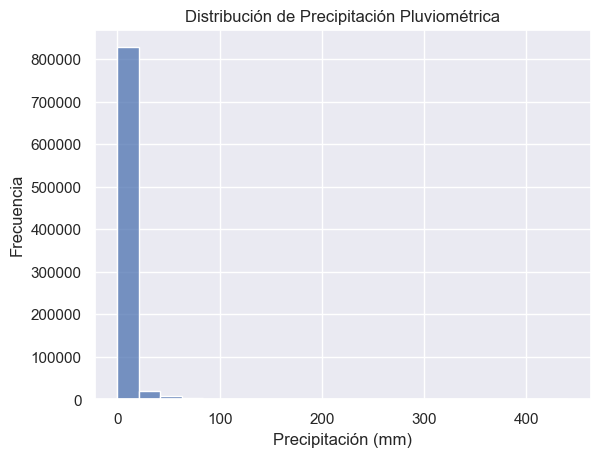

In [243]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Aplicamos una **transformación logarítmica seguida de Min-Max** porque nuestros datos de precipitación están muy sesgados: la mayoría de los días registran 0 mm y solo unos pocos presentan lluvias extremas. Con el log reducimos la asimetría y comprimimos esos valores altos, y luego con Min-Max llevamos todo a un rango 0–1, logrando que la escala sea más interpretable y útil para nuestros modelos sin que la mayor parte de los datos quede concentrada en un solo valor.


In [244]:
col_log = np.log1p(df["precipitacion_pluviometrica"])  # log(1+x)
df["precipitacion_pluviometrica"] = (col_log - col_log.min()) / (col_log.max() - col_log.min())

df.precipitacion_pluviometrica.describe()


count    858934.000000
mean          0.062892
std           0.150033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: precipitacion_pluviometrica, dtype: float64

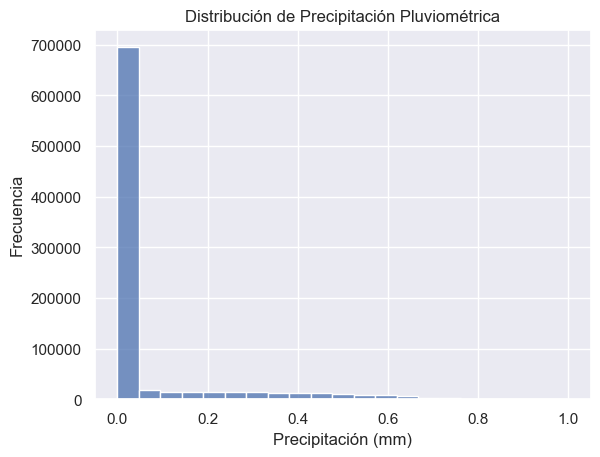

In [245]:
sns.histplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

Con el fin de imputar valores a los campos nulos, queremos ver los registros que no son nulos pero que tienen valores faltantes antes o después en la serie, de manera de poder estimar dichos valores intermedios a partir de la tendencia de los datos existentes. Para esto utilizamos **interpolación**, que nos permite calcular valores aproximados manteniendo la continuidad de la variable en lugar de repetir el último dato válido.

In [246]:
df.precipitacion_pluviometrica = df.precipitacion_pluviometrica.interpolate(method='spline', order=2)
df.precipitacion_pluviometrica.describe()

count    923777.000000
mean          0.062606
std           0.144682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.043068
max           1.000000
Name: precipitacion_pluviometrica, dtype: float64

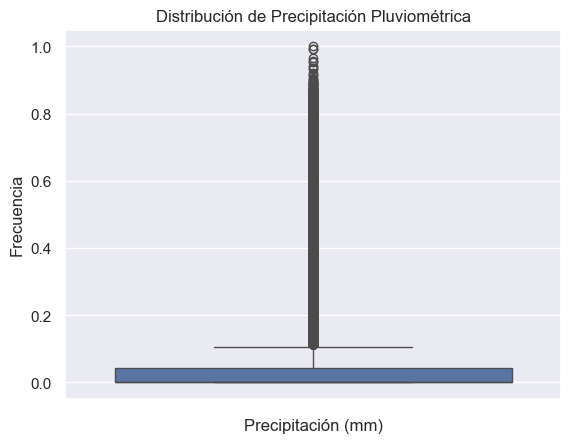

In [247]:
sns.boxplot(df["precipitacion_pluviometrica"].dropna())
plt.title("Distribución de Precipitación Pluviométrica")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

En nuestro caso realizamos la interpolación después de haber estandarizado los datos, ya que el modelo trabajará únicamente en ese espacio transformado y no necesitábamos preservar la interpretación física de la variable en milímetros de lluvia. De esta forma, logramos que los valores imputados sigan la misma escala que el resto del dataset ya normalizado, manteniendo la coherencia numérica dentro del proceso de modelado y evitando inconsistencias al entrenar los algoritmos.

##### `temperatura_media`, `temperatura_minima` y `temperatura_maxima`

| Columna                   | Descripción                                | Unidad | Nombre unidad                  |
|----------------------------|--------------------------------------------|--------|--------------------------------|
| temperatura_abrigo_150cm  | Temperatura media medida a 150 cm bajo abrigo | °C     | Grados Celsius (temperatura)   |


In [248]:
# copia de seguridad para rollback

checkpoint_2 = df.copy()

In [249]:
stats_temperatura = df[[
    'temperatura_media',
    'temperatura_minima',
    'temperatura_maxima'
]].describe()

# Agregar fila de % de nulos
stats_temperatura.loc['% nulos'] = df[[
    'temperatura_media',
    'temperatura_minima',
    'temperatura_maxima'
]].isnull().sum() * 100

stats_temperatura

,temperatura_media,temperatura_minima,temperatura_maxima
count,923777.000000,923777.000000,923777.000000
mean,17.922972,11.439132,24.803620
std,6.983403,7.601405,7.509910
min,-29.700000,-30.000000,-29.400000
25%,12.855550,6.300000,19.500000
50%,18.450000,12.200000,25.200000
75%,23.250000,17.200000,30.316981
max,55.000000,50.000000,60.000000
% nulos,100.000000,100.000000,100.000000


Primero, revisamos los casos que hay **incoherencias**, es decir, registros en donde la *minima* es **mayor** que la *maxima*

In [250]:
df.loc[df.temperatura_minima > df.temperatura_maxima]

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_media,humedad_media,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,precipitacion_log_norm
31,2009-09-06,A872801,0.050914,10.542037,10.028378,17.018800,71.000000,12.425080,14.434170,NaN,NaN,NaN,0.050914
46,2009-09-21,A872801,0.050914,10.789907,10.276248,17.266670,51.000000,8.536985,11.165420,NaN,NaN,NaN,0.050914
56,2009-10-05,A872801,0.050915,15.096377,14.582718,21.573140,79.000000,16.252500,18.580170,NaN,NaN,NaN,0.050915
157,2010-08-27,A872801,0.050917,7.999877,7.486218,14.476640,83.000000,12.238580,14.338990,NaN,NaN,NaN,0.050917
514,2012-03-15,A872801,0.050927,12.232098,12.128771,18.301882,63.666667,12.079722,13.396626,NaN,NaN,NaN,0.050927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919081,2012-08-03,NH0550,0.000000,1.923237,1.409578,8.400000,65.000000,2.200000,7.200000,4.200000,0.00,0.000000,0.000000
919689,2014-04-03,NH0550,0.319427,19.323237,18.809578,25.800000,89.000000,23.800000,29.500000,11.800000,4.40,37.000000,0.319427
919710,2014-04-24,NH0550,0.000000,14.273237,13.759578,20.750000,77.000000,16.600000,18.800000,10.000000,4.00,36.000000,0.000000
919723,2014-05-07,NH0550,0.000000,14.923237,14.409578,21.400000,95.000000,20.600000,24.200000,5.200000,0.80,7.000000,0.000000


In [251]:
mask_min_max = df.temperatura_minima > df.temperatura_maxima

df.loc[mask_min_max, ["temperatura_minima", "temperatura_maxima"]] = (
    df.loc[mask_min_max, ["temperatura_maxima", "temperatura_minima"]].values
)

Para los valores nulos de la columna `temperatura_media`, proponemos la siguiente solución para imputar valores: Obtener un promedio de la minima y la maxima.

In [252]:
mask_temp = (
    df2.temperatura_media.isna() &
    df2.temperatura_minima.notna() &
    df2.temperatura_maxima.notna()
)

df.loc[mask_temp, "temperatura_media"] = (
    (df.loc[mask_temp, "temperatura_minima"] + df.loc[mask_temp, "temperatura_maxima"]) / 2
)

Para los valores de la minima lo que hacemos es algo similar, pero en vez de hacer un promedio entre `temperatura_media` y `temperatura_maxima`, a la `temperatura_media` le restamos la media de diferencia que hay en todo el dataset entre la minima y el promedio.

In [253]:
df.temperatura_minima.isna().sum()

np.int64(1)

In [254]:
promedio_min_media = abs(np.mean(df.temperatura_minima - df.temperatura_media))
mask_minima = (df.temperatura_minima.isna() & df.temperatura_media.notna())

df.loc[mask_minima, 'temperatura_minima'] = (
    df.loc[mask_minima, 'temperatura_media'] - promedio_min_media
)

In [255]:
df.temperatura_minima.isna().sum()

np.int64(1)

Aplicamos la misma logica de imputación pero para los valores de la maxima.

In [256]:
df.temperatura_maxima.isna().sum()

np.int64(1)

In [257]:
promedio_max_media = abs(np.mean(df.temperatura_maxima - df.temperatura_media))
mask_maxima = (df.temperatura_maxima.isna() & df.temperatura_media.notna())

df.loc[mask_maxima, 'temperatura_maxima'] = (
    df.loc[mask_maxima, 'temperatura_media'] - promedio_max_media
)

In [258]:
df.temperatura_maxima.isna().sum()

np.int64(1)

Ahora con los valores nulos que quedan en las columnas de temperatura, imputamos valores "sinteticos" haciendo una **interpolación lineal**, que lo que hace es rellenar valores faltantes en una serie de datos siguiendo una recta entre los puntos conocidos más cercanos.

In [259]:
df.loc[:, 'temperatura_minima'] = df.temperatura_minima.interpolate(method='linear')
df.loc[:, 'temperatura_maxima'] = df.temperatura_maxima.interpolate(method='linear')
df.loc[:, 'temperatura_media'] = df.temperatura_media.interpolate(method='linear')

In [260]:
df.isna().sum()

fecha                             0
id_estacion                       0
precipitacion_pluviometrica       1
temperatura_minima                1
temperatura_maxima                1
temperatura_media                 1
humedad_media                     1
rocio_medio                       1
tesion_vapor_media                1
radiacion_global               2515
heliofania_efectiva            2515
heliofania_relativa            2515
precipitacion_log_norm            1
dtype: int64

#### `humedad_media`

| Columna                 | Descripción                               | Unidad | Nombre unidad   |
|--------------------------|-------------------------------------------|--------|-----------------|
| humedad_media_8_14_20    | Humedad relativa media a horas 8, 14 y 20 | %      | Porcentaje (%)  |


In [261]:
checkpoint_3 = df.copy()

In [262]:
df.humedad_media.isna().sum()

np.int64(1)

<Axes: ylabel='humedad_media'>

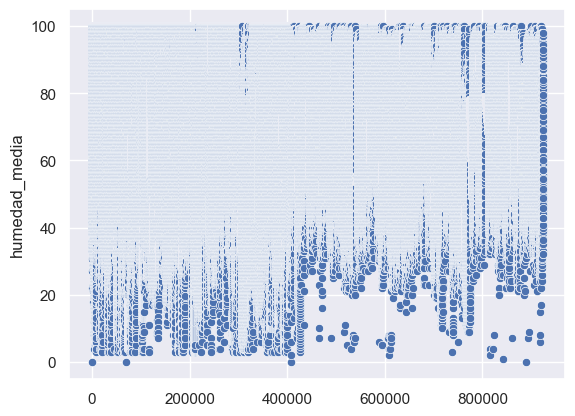

In [263]:
sns.scatterplot(df.humedad_media)

In [264]:
df.humedad_media.describe()

count    923777.000000
mean         67.317515
std          18.088431
min           0.000000
25%          56.000000
50%          69.000000
75%          80.547855
max         100.000000
Name: humedad_media, dtype: float64

<Axes: ylabel='humedad_media'>

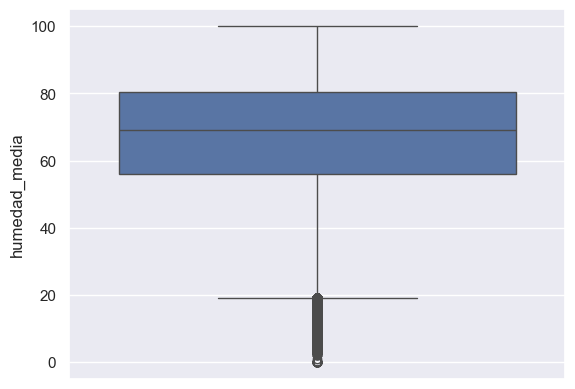

In [265]:
sns.boxplot(df.humedad_media)

<Axes: xlabel='humedad_media', ylabel='Count'>

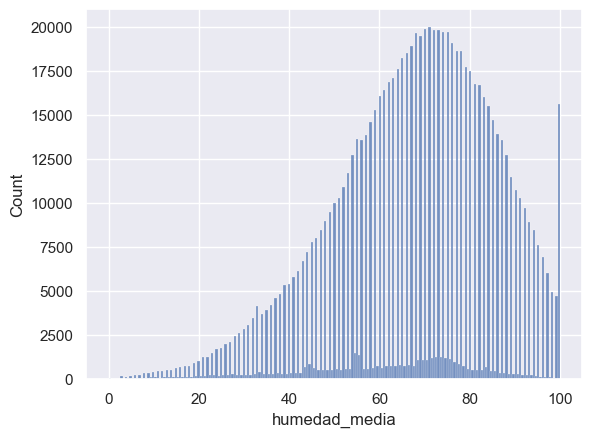

In [266]:
sns.histplot(df.humedad_media)

Para los valores nulos de esta columna, *ChatGPT* nos recomendó hacer una **interpolación lineal** para obtener resultados mas realistas, ya que son valores expresados en porcentajes.

In [267]:
df.loc[:,'humedad_media'] = df.humedad_media.interpolate(method='linear')

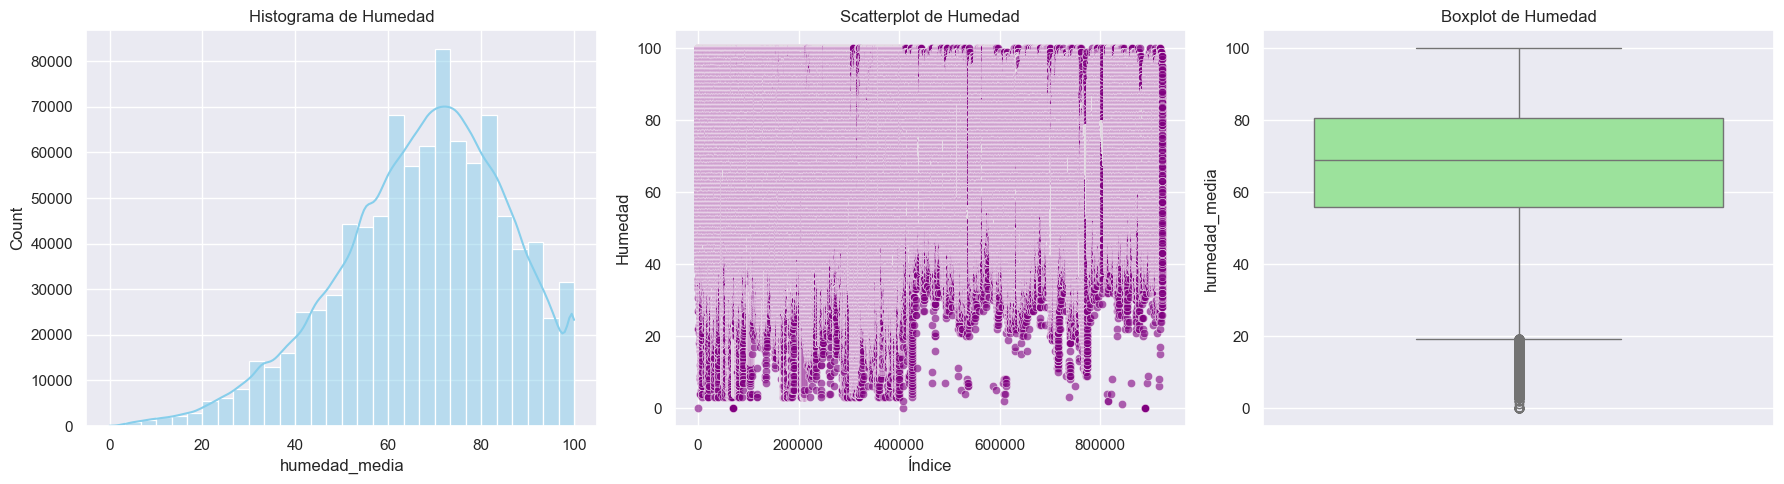

In [268]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograma con KDE
sns.histplot(df["humedad_media"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Histograma de Humedad")

# Scatterplot contra el índice
sns.scatterplot(x=df.index, y=df["humedad_media"], ax=axes[1], color="purple", alpha=0.6)
axes[1].set_title("Scatterplot de Humedad")
axes[1].set_xlabel("Índice")
axes[1].set_ylabel("Humedad")

# Boxplot
sns.boxplot(y=df["humedad_media"], ax=axes[2], color="lightgreen")
axes[2].set_title("Boxplot de Humedad")

# Ajustar espaciado
plt.tight_layout()
plt.show()

In [269]:
df.isna().sum()

fecha                             0
id_estacion                       0
precipitacion_pluviometrica       1
temperatura_minima                1
temperatura_maxima                1
temperatura_media                 1
humedad_media                     1
rocio_medio                       1
tesion_vapor_media                1
radiacion_global               2515
heliofania_efectiva            2515
heliofania_relativa            2515
precipitacion_log_norm            1
dtype: int64

#### `rocio_medio`

| Columna      | Descripción                               | Unidad | Nombre unidad                        |
|--------------|-------------------------------------------|--------|--------------------------------------|
| rocio_medio  | Temperatura media del punto de rocío       | °C     | Grados Celsius (temperatura)         |


In [270]:
checkpoint_4 = df.copy()

In [271]:
df.rocio_medio.isna().sum()

np.int64(1)

In [272]:
df.rocio_medio.describe()

count    923777.000000
mean         11.723903
std           7.416147
min         -35.922160
25%           6.700000
50%          12.400000
75%          17.301110
max          48.777840
Name: rocio_medio, dtype: float64

<Axes: xlabel='rocio_medio', ylabel='Count'>

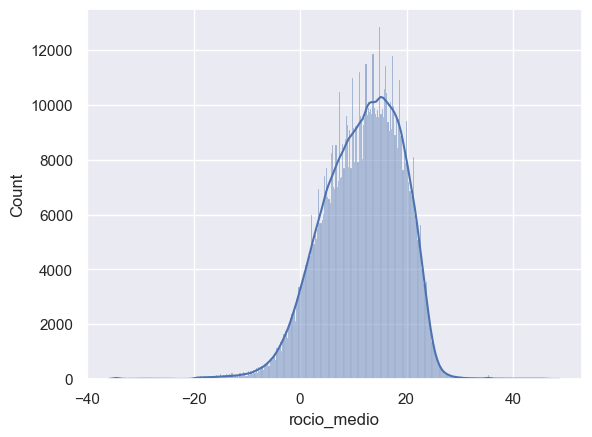

In [273]:
sns.histplot(df.rocio_medio, kde=True)

Para la imputación de los valores nulos de esta columna, pensamos en ver que relación hay entre la `temperatura_promedio` y `rocio_medio` para decidir si podemos tener una solucion viable.

In [274]:
df.rocio_medio.corr(df.temperatura_media) # la correlación va de 0 a 1

np.float64(0.8457271468450557)

Dado a que estas columnas tienen un alto grado de correlación, optamos por sacar la diferencia media que suele haber entre estas columnas.

In [275]:
mask_rocio_temp = (df.rocio_medio.notna() & df.temperatura_media.notna())
diff_rocio_temp = abs(df.loc[mask_rocio_temp].temperatura_media - df.loc[mask_rocio_temp].rocio_medio).mean()
print(diff_rocio_temp)

6.22215951303034


<Axes: ylabel='Count'>

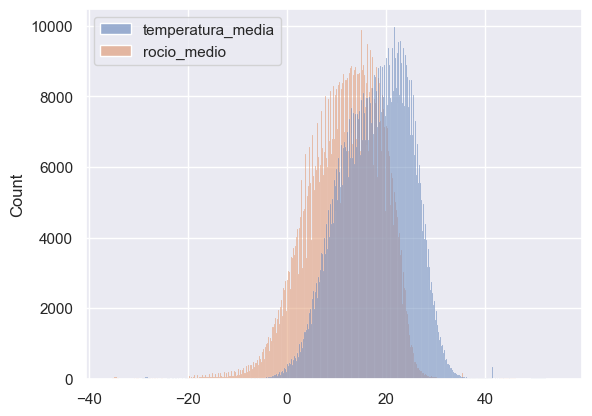

In [276]:
sns.histplot(df[['temperatura_media', 'rocio_medio']])

<Axes: ylabel='rocio_medio'>

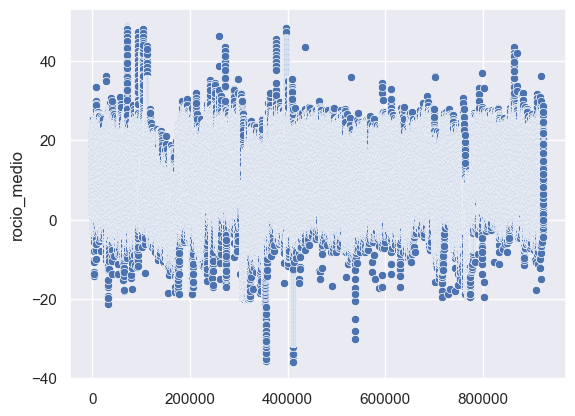

In [277]:
sns.scatterplot(df.rocio_medio)

Segun ChatGPT:
 
```
El rocío suele estar ligeramente por debajo de la temperatura ambiente.

La diferencia depende mucho de la humedad relativa (con humedad alta, rocío ≈ temperatura; con aire seco, la diferencia puede ser grande).

Si usás este enfoque, básicamente estás diciendo:

“Si me falta rocío, lo estimo como temperatura promedio – diferencia media observada”.

Ventaja: mantiene una relación física entre temperatura y rocío.

Problema: es demasiado global → esa diferencia no es constante, varía con la estación del año, clima y ubicación.
Ejemplo: en Misiones y en Mendoza, la diferencia típica no es la misma.

```

Como sabemos que los cambios se aplicaran a cada estación por separado, elegimos la opcion de imputar valores en función de la diferencia entre la temperatura y el rocio.

In [278]:
mask_rocio_temp_imputar = (df.rocio_medio.isna() & df.temperatura_media.notna())
df.loc[mask_rocio_temp_imputar, 'rocio_medio'] = df.loc[mask_rocio_temp_imputar].temperatura_media - diff_rocio_temp

Comprobamos los nulos

In [279]:
df.rocio_medio.isna().sum()

np.int64(1)

Verificamos si cambio la correlación entre el `rocio_medio` y `temperatura_media`

In [280]:
df.rocio_medio.corr(df.temperatura_media)

np.float64(0.8457271468450557)

Ahora la correlación subio un poco, tiene logica.

In [281]:
df.isna().sum()

fecha                             0
id_estacion                       0
precipitacion_pluviometrica       1
temperatura_minima                1
temperatura_maxima                1
temperatura_media                 1
humedad_media                     1
rocio_medio                       1
tesion_vapor_media                1
radiacion_global               2515
heliofania_efectiva            2515
heliofania_relativa            2515
precipitacion_log_norm            1
dtype: int64

#### `tension_vapor_media`

| Columna            | Descripción               | Unidad | Nombre unidad              |
|--------------------|---------------------------|--------|----------------------------|
| tesion_vapor_media | Tensión de vapor media    | hPa    | Hectopascales (presión)    |


In [282]:
checkpoint_5 = df.copy()

In [283]:
# cantidad de nulos
print(df.tesion_vapor_media.isna().sum())

# porcentaje de nulos
print(df.tesion_vapor_media.isna().sum() / len(df))

1
1.0825111661026783e-06


Esta mal escrito el nombre de la feature, procedemos a corregirla.

In [284]:
df.tesion_vapor_media.describe()

count    923777.000000
mean         15.031813
std           6.995294
min           0.000000
25%           9.600000
50%          14.264650
75%          19.800000
max         128.994959
Name: tesion_vapor_media, dtype: float64

<Axes: xlabel='tesion_vapor_media', ylabel='Count'>

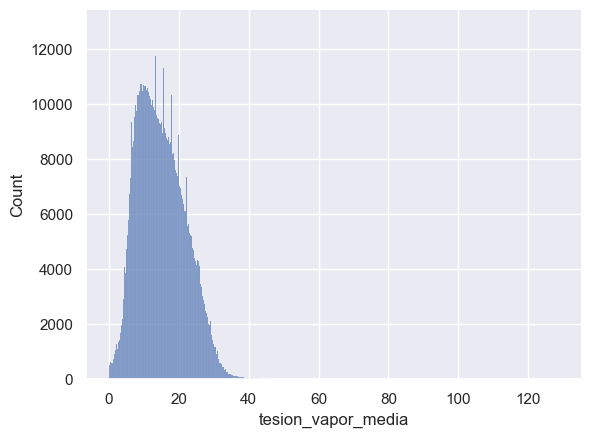

In [285]:
sns.histplot(df.tesion_vapor_media)

Según *ChatGPT*:

La tensión de vapor está relacionada con la humedad relativa y la temperatura según:

$$
e = \frac{RH}{100} \times e_s(T)
$$

donde \(e_s(T)\) es la presión de vapor de saturación, que depende solo de la temperatura:

$$
e_s(T) = 6.11 \times \exp\left(\frac{17.27 \times T}{T + 237.3}\right)
$$


👉 Esto significa que la tensión de vapor no es una variable “independiente”, sino **derivada** de temperatura y humedad.

Sabiendo esta información, procedemos a realizar el calculo que siguiere el chat para calcular la tensión de vapor.


In [286]:
def tension_vapor(temp, rh):
    return (rh/100) * (6.11 * np.exp((17.27 * temp) / (temp + 237.3)))

In [287]:
mask_tension_vapor = df["tesion_vapor_media"].isna() & df["temperatura_media"].notna() & df["humedad_media"].notna()
df.loc[mask_tension_vapor]

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_media,humedad_media,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,precipitacion_log_norm


In [288]:
df.loc[mask_tension_vapor, "tesion_vapor_media"] = tension_vapor(df.loc[mask_tension_vapor, "temperatura_media"], 
                                                   df.loc[mask_tension_vapor, "humedad_media"])

<Axes: xlabel='tesion_vapor_media', ylabel='Count'>

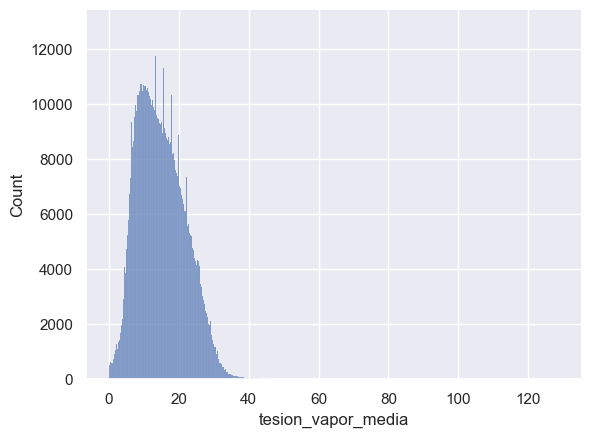

In [289]:
sns.histplot(df.tesion_vapor_media)

In [290]:
df.isna().sum()

fecha                             0
id_estacion                       0
precipitacion_pluviometrica       1
temperatura_minima                1
temperatura_maxima                1
temperatura_media                 1
humedad_media                     1
rocio_medio                       1
tesion_vapor_media                1
radiacion_global               2515
heliofania_efectiva            2515
heliofania_relativa            2515
precipitacion_log_norm            1
dtype: int64

#### `radiacion_global`

| Columna          | Descripción             | Unidad | Nombre unidad                  |
|------------------|-------------------------|--------|--------------------------------|
| radiacion_global | Radiación solar global  | MJ/m²  | Megajulios por metro cuadrado  |


In [291]:
checkpoint_6 = df.copy()

In [303]:
print('total de nulos:', df.radiacion_global.isna().sum())
print('porcentaje de nulos:', df.radiacion_global.isna().sum() / len(df))

total de nulos: 2515
porcentaje de nulos: 0.002722515582748236


In [293]:
df.radiacion_global.describe()

count    921263.000000
mean         16.090895
std           7.485423
min           0.000000
25%          10.742417
50%          15.759759
75%          21.532152
max          50.000000
Name: radiacion_global, dtype: float64

<Axes: xlabel='radiacion_global', ylabel='Count'>

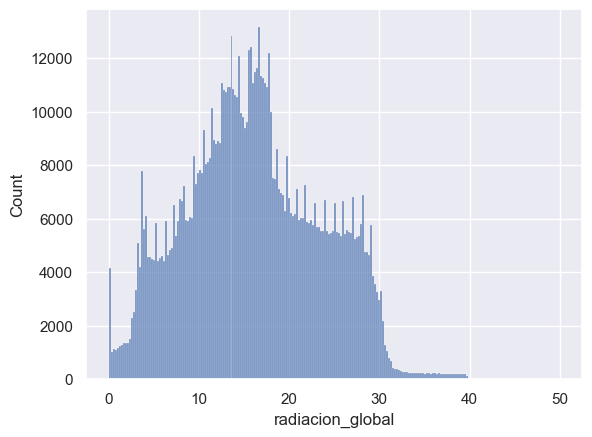

In [294]:
sns.histplot(df.radiacion_global)

Vemos cuales variables tienen mayor correlación con la columna de `radiacion_global`.

In [295]:
df.select_dtypes(include=[float, int]).corr().loc['radiacion_global'].sort_values()

humedad_media                 -0.340616
precipitacion_pluviometrica   -0.144730
precipitacion_log_norm        -0.144730
rocio_medio                    0.085518
tesion_vapor_media             0.093426
temperatura_minima             0.126589
temperatura_media              0.263320
temperatura_maxima             0.357294
heliofania_relativa            0.735496
heliofania_efectiva            0.825769
radiacion_global               1.000000
Name: radiacion_global, dtype: float64

Como se puede observar, las columnas que mayor similitud con la radiación son las de heliofania, las cuales representan las horas del sol durante el dia.

In [296]:
df.loc[(df.radiacion_global.isna() & df.heliofania_efectiva.notna())][['radiacion_global', 'heliofania_efectiva', 'heliofania_relativa']]

,radiacion_global,heliofania_efectiva,heliofania_relativa


Como está columna representa "que tan fuerte" estuvo el sol durante todo el dia, podemos encontrar inconsistencias verificando si la columna `heliofania_efectiva`, que representa la cantidad de horas de sol efectiva, es mayor que cero y al mismo tiempo la `radiacion_global` sea cero. De esta manera, podemos saber que registros fueron cargados erroneamente con ceros. 

In [297]:
mask_radiacion_heliofania = (df.radiacion_global == 0) & (df.heliofania_efectiva > 0)
df.loc[mask_radiacion_heliofania]

,fecha,id_estacion,precipitacion_pluviometrica,temperatura_minima,temperatura_maxima,temperatura_media,humedad_media,rocio_medio,tesion_vapor_media,radiacion_global,heliofania_efectiva,heliofania_relativa,precipitacion_log_norm
5309,2025-05-16,A872801,0.710903,18.4,23.4,20.05834,100.0,19.37419,22.507540,0.0,4.335605,42.500000,0.710903
27687,2014-05-08,A872810,0.000000,11.2,17.6,14.68264,86.0,12.41507,14.445040,0.0,6.590660,45.917503,0.000000
27688,2014-05-09,A872810,0.000000,10.4,20.5,14.95625,78.0,11.37040,13.486020,0.0,6.590646,45.916915,0.000000
27689,2014-05-10,A872810,0.294123,12.0,22.5,16.76945,71.0,12.26854,14.286250,0.0,6.590631,45.916327,0.294123
27690,2014-05-11,A872810,0.365179,14.5,17.4,15.67777,100.0,14.78812,16.831590,0.0,6.590617,45.915740,0.365179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412026,2025-07-10,A875001,0.061547,10.6,15.4,12.16389,100.0,11.66842,13.733260,0.0,4.972500,44.248555,0.061547
412032,2025-07-16,A875001,0.061547,9.2,20.2,12.93750,100.0,11.52917,13.742540,0.0,4.996755,44.317919,0.061547
516380,2020-04-29,NH0114,0.417212,9.1,23.1,16.10000,63.0,9.87784,11.532354,0.0,9.800000,78.753553,0.417212
739575,2025-04-24,NH0444,0.000000,18.8,27.4,23.10000,83.0,19.30000,22.400000,0.0,0.200000,2.000000,0.000000


Son unicamente tres registros...

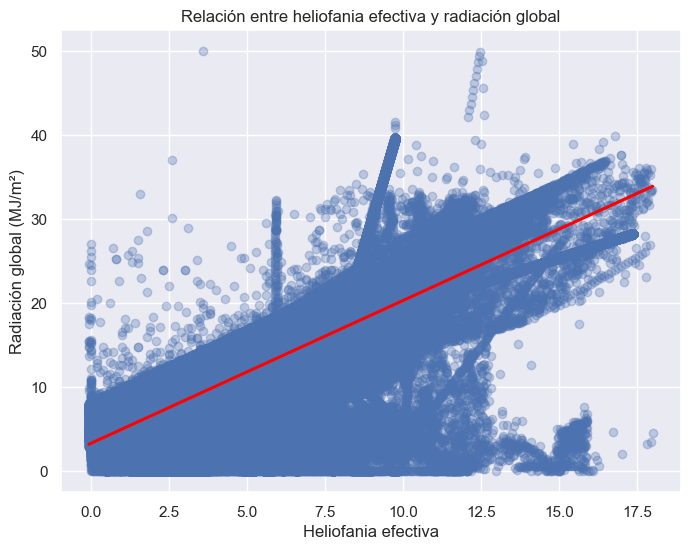

In [298]:
plt.figure(figsize=(8,6))
sns.regplot(
    x="heliofania_efectiva",
    y="radiacion_global",
    data=df,
    scatter_kws={"alpha":0.3},   # puntos más transparentes
    line_kws={"color":"red"}     # línea de regresión en rojo
)
plt.title("Relación entre heliofania efectiva y radiación global")
plt.xlabel("Heliofania efectiva")
plt.ylabel("Radiación global (MJ/m²)")
plt.show()

Sabiendo esta información, lo que decidimos es que para los valores nulos de `radiacion_global` vamos a imputarle datos con una regresión lineal a partir de los datos de `heliofania_efectiva` y `heliofania_relativa`. Para realizar esta hazaña, usaremos sklearn.

In [301]:
from sklearn.linear_model import LinearRegression

mask_rad_helio = df.radiacion_global.notna() & df.heliofania_efectiva.notna()
print('Filas mascara', mask_rad_helio.sum())

X = df.loc[mask_rad_helio, ["heliofania_efectiva"]]
y = df.loc[mask_rad_helio, "radiacion_global"]

model = LinearRegression()
model.fit(X, y)

Filas mascara 921263


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [300]:
mask_null = df.radiacion_global.isna() & df.heliofania_efectiva.notna()
df.loc[mask_null, "radiacion_global"] = model.predict(df.loc[mask_null, ["heliofania_efectiva"]])

print("Imputados con regresión:", mask_null.sum())

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [ ]:
df.radiacion_global.isna().sum()

np.int64(404326)

Con el resto de los valores nulos que no quedarón, hacemos una **interpolación temporal** (por fecha) ya que esta variable es suave en el tiempo (sube y baja diariamente, pero no saltan con tanto ruido).

In [ ]:
df = df.sort_values(by=['id_estacion', 'fecha'])
df.radiacion_global = df.radiacion_global.interpolate(method='linear')

In [ ]:
df.isna().sum()

fecha                               0
id_estacion                         0
precipitacion_pluviometrica     64844
temperatura_minima                  1
temperatura_maxima                  1
temperatura_media                   1
humedad_media                       1
rocio_medio                         1
tesion_vapor_media                  1
radiacion_global                 2515
heliofania_efectiva            420209
heliofania_relativa            427858
precipitacion_log_norm              1
dtype: int64

In [ ]:
df.loc[df.radiacion_global.isna()].id_estacion.unique()

array(['A872801'], dtype=object)

Vemos que los registros que siguen nulos son de una estacion en especifico, por lo que en el etl como ultima opcion borraremos los resgitros que queden.

#### `heliofania_efectiva` y `heliofania_relativa`

| Columna              | Descripción                                   | Unidad | Nombre unidad   |
|-----------------------|-----------------------------------------------|--------|-----------------|
| heliofania_efectiva  | Horas de sol efectivas                        | horas  | Horas           |
| heliofania_relativa  | Porcentaje de horas de sol respecto al máximo | %      | Porcentaje (%)  |


In [ ]:
checkpoint_7 = df.copy()

Para manejar los nulos de estas columnas, hacemos una regresión lineal tambien.

In [ ]:
df.heliofania_efectiva.isna().sum()

np.int64(420209)

In [ ]:
df.heliofania_relativa.isna().sum()

np.int64(427858)

Imputación para `heliofania_efectiva`.

In [ ]:
mask_valid = (df["heliofania_efectiva"].notna() & df["heliofania_relativa"].notna())
mask_null  = (df["heliofania_efectiva"].isna() & df["heliofania_relativa"].notna())

print("Filas válidas:", mask_valid.sum())
print("Filas nulas a imputar:", mask_null.sum())

# Entrenar regresión lineal
X = df.loc[mask_valid, ["heliofania_relativa"]].values
y = df.loc[mask_valid, "heliofania_efectiva"].values

model = LinearRegression()
model.fit(X, y)

# Predecir valores nulos
df.loc[mask_null, "heliofania_efectiva"] = model.predict(
    df.loc[mask_null, ["heliofania_relativa"]].values)

Filas válidas: 495389
Filas nulas a imputar: 531


In [ ]:
print(df.heliofania_efectiva.isna().sum())

419678


Imputación para `heliofania_relativa`.

In [ ]:
mask_valid = df["heliofania_relativa"].notna() & df["heliofania_efectiva"].notna()
mask_null  = df["heliofania_relativa"].isna() & df["heliofania_efectiva"].notna()

print("Filas válidas:", mask_valid.sum())
print("Filas nulas a imputar:", mask_null.sum())

# Entrenar regresión lineal
X = df.loc[mask_valid, ["heliofania_efectiva"]].values
y = df.loc[mask_valid, "heliofania_relativa"].values

model = LinearRegression()
model.fit(X, y)

# Predecir valores nulos
df.loc[mask_null, "heliofania_relativa"] = model.predict(
    df.loc[mask_null, ["heliofania_efectiva"]].values
)

Filas válidas: 495920
Filas nulas a imputar: 8180


In [ ]:
df.isna().sum()

fecha                               0
id_estacion                         0
precipitacion_pluviometrica     64844
temperatura_minima                  1
temperatura_maxima                  1
temperatura_media                   1
humedad_media                       1
rocio_medio                         1
tesion_vapor_media                  1
radiacion_global                 2515
heliofania_efectiva            419678
heliofania_relativa            419678
precipitacion_log_norm              1
dtype: int64

Para estos datos que sigue quedando, haremos una interpolación lineal.

In [ ]:
df.heliofania_efectiva = df.heliofania_efectiva.interpolate(method='linear')
df.heliofania_relativa = df.heliofania_relativa.interpolate(method='linear')

In [ ]:
df.isna().sum()

fecha                              0
id_estacion                        0
precipitacion_pluviometrica    64844
temperatura_minima                 1
temperatura_maxima                 1
temperatura_media                  1
humedad_media                      1
rocio_medio                        1
tesion_vapor_media                 1
radiacion_global                2515
heliofania_efectiva             2515
heliofania_relativa             2515
precipitacion_log_norm             1
dtype: int64